# Introducción a los vectores geoespaciales GEOPANDAS

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 930 kB/s eta 0:00:01    |███▍                            | 1.6 MB 2.7 MB/s eta 0:00:06     |██████▉                         | 3.3 MB 1.5 MB/s eta 0:00:09     |█████████████████▊              | 8.5 MB 1.8 MB/s eta 0:00:04     |██████████████████████████████▎ | 14.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.4 MB/s eta 0:00:01     |██████████▋                     | 368 kB 2.4 MB/s eta 0:00:01


In [3]:
%matplotlib inline

import pandas as pd
import geopandas

## Importamos los datos espaciales

Trabajamos con los ficheros con un formato del tipo GIS:
- ESRI shapefiles
- GeoJSON
- geopackage files
- PostGIS (PostgreSQL)

Interviene el entorno Fiona para que pueda leer estos ficheros cuando ejecutamos `geopandas.read_file`


In [4]:
countries = geopandas.read_file("zip://ne_110m_admin_0_countries.zip")

DriverError: '/vsizip/ne_110m_admin_0_countries.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [8]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [9]:
type(countries)

geopandas.geodataframe.GeoDataFrame

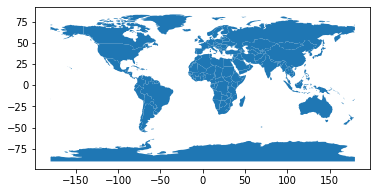

In [7]:
countries.plot()

## Que es un geoDataFrame?

In [10]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [11]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [12]:
countries.geometry.area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

In [13]:
countries['pop_est'].mean()

41712369.84180791

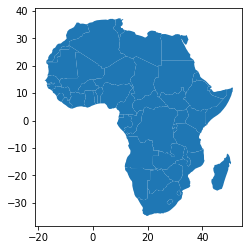

In [14]:
# podemos realizar filtros
africa = countries[countries['continent'] == 'Africa']
africa.plot()

## Geometria: puntos, rectas, poligonos

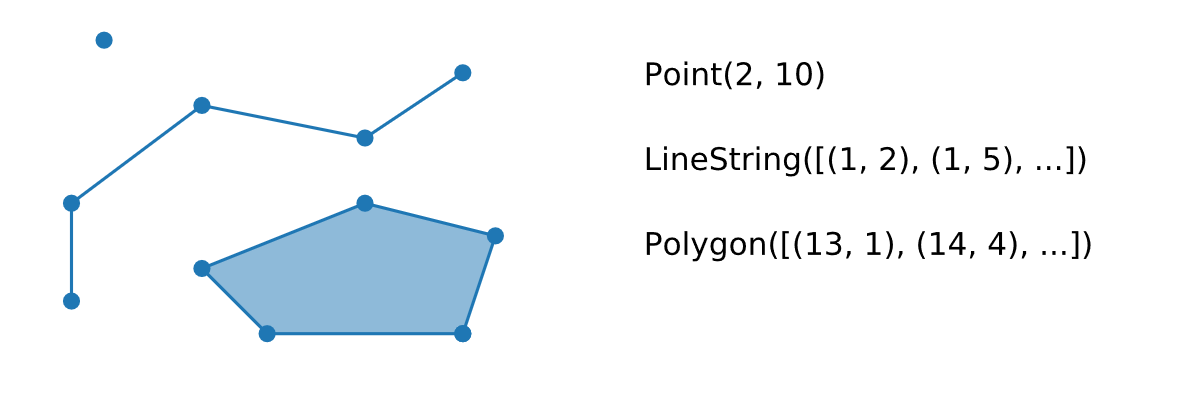

In [15]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


In [17]:
cities = geopandas.read_file("zip://ne_110m_populated_places.zip")

In [18]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [19]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


In [21]:
type(cities.geometry[0])

shapely.geometry.point.Point

In [22]:
rivers = geopandas.read_file("zip://ne_50m_rivers_lake_centerlines.zip")

In [23]:
rivers.head()

,featurecla,name,geometry
0,Lake Centerline,Kama,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,River,Kama,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,Lake Centerline,Abay,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,Lake Centerline,Al Furat,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,Lake Centerline,Alabama,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


In [25]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


In [26]:
print(rivers.geometry[4])

MULTILINESTRING ((-86.52176754393696 33.03211843501782, -86.52099239758104 33.01426422771198, -86.46146114791361 32.83567047781037, -86.44536393889462 32.81125336355194), (-86.20031429716704 33.58782094957724, -86.21176062715119 33.55996735311089, -86.32997046576435 33.4444705262938))


## La librería `shapely`

In [28]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

In [29]:
from shapely.geometry import Point, Polygon, LineString

In [30]:
p = Point(0, 0)
print(p)

POINT (0 0)


In [31]:
polygon = Polygon([(1,1), (2,2), (2,1)])
print(polygon)

POLYGON ((1 1, 2 2, 2 1, 1 1))


In [32]:
polygon.area

0.5

In [33]:
polygon.distance(p)

1.4142135623730951

## Representación gráfica de las diferentes capas

[(-40.0, 40.0), (-20.0, 60.0)]

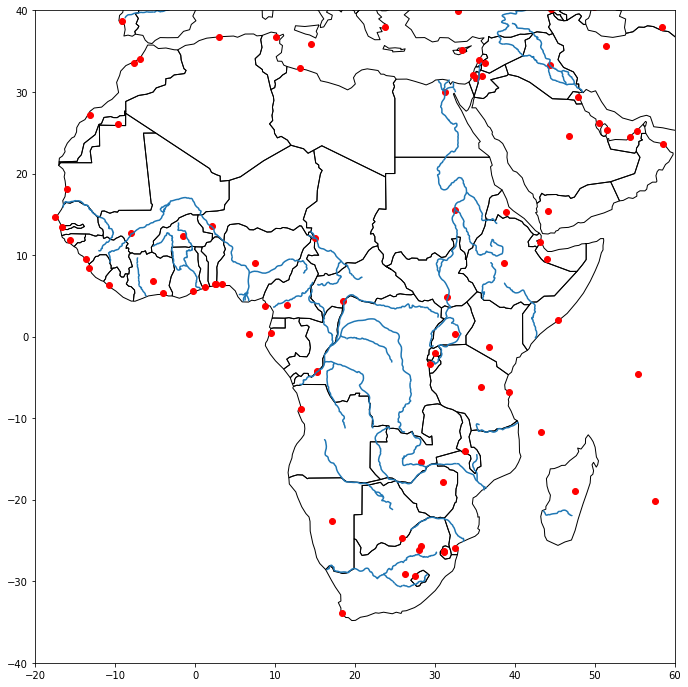

In [35]:
ax = countries.plot(edgecolor = 'k', facecolor='none', figsize=(25,12))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20,60), ylim=(-40,40))

## Práctica con bikesharing

In [5]:
#Cargamos los datos de las estaciones con geopandas
stations = geopandas.read_file("paris_bike_stations_mercator.gpkg")
stations.head(10)

DriverError: paris_bike_stations_mercator.gpkg: No such file or directory

In [38]:
stations.shape

(1226, 4)

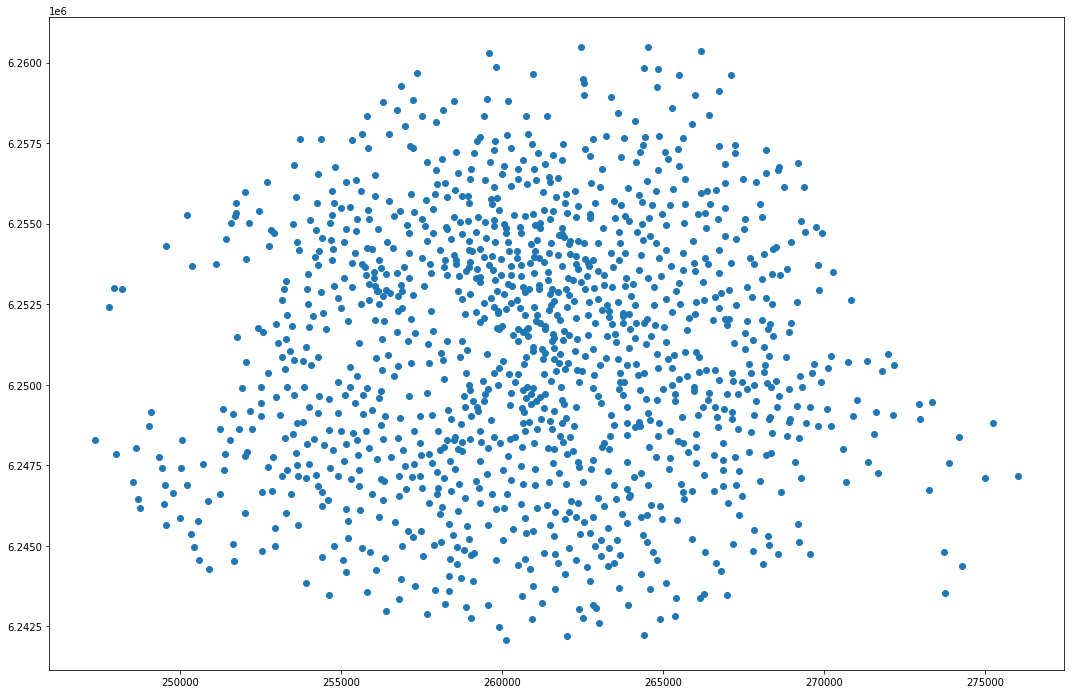

In [39]:
stations.plot(figsize=(24,12))

In [42]:
!pip install contextily

     |████████████████████████████████| 18.3MB 1.4MB/s 


In [43]:
## Representación gráfica de las diferentes capas con `contextily`
import contextily

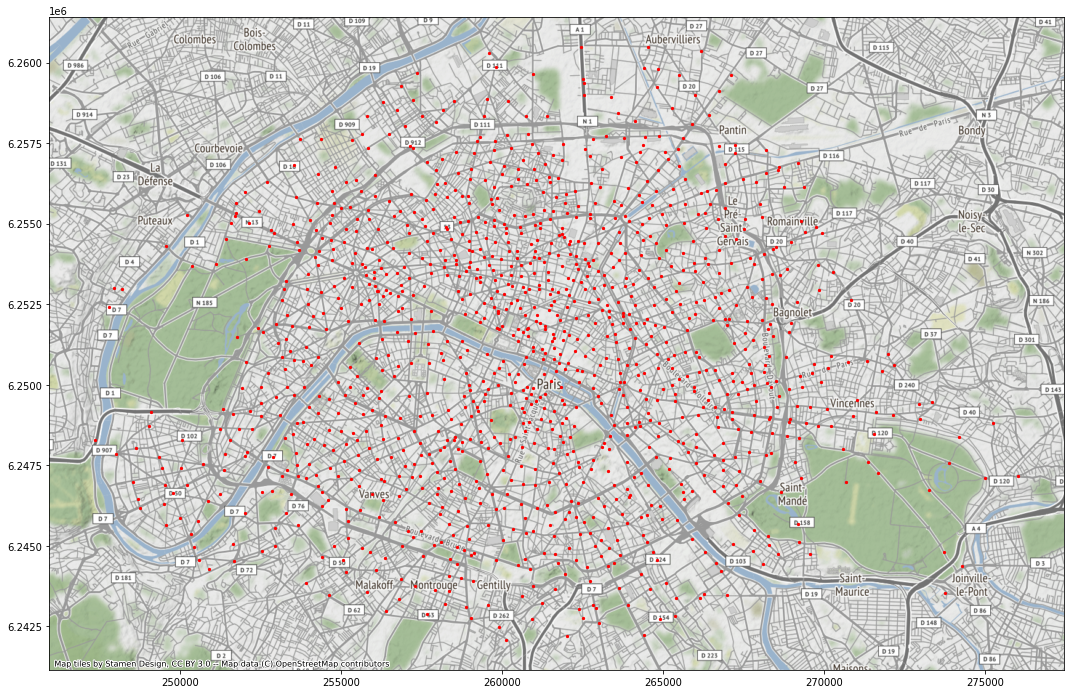

In [46]:
ax = stations.plot(figsize=(24,12), markersize=5, color='red')
contextily.add_basemap(ax)

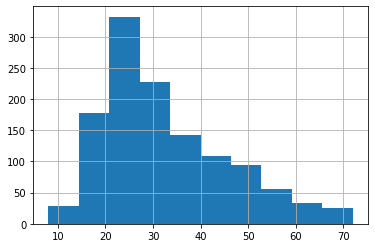

In [45]:
stations['bike_stands'].hist()

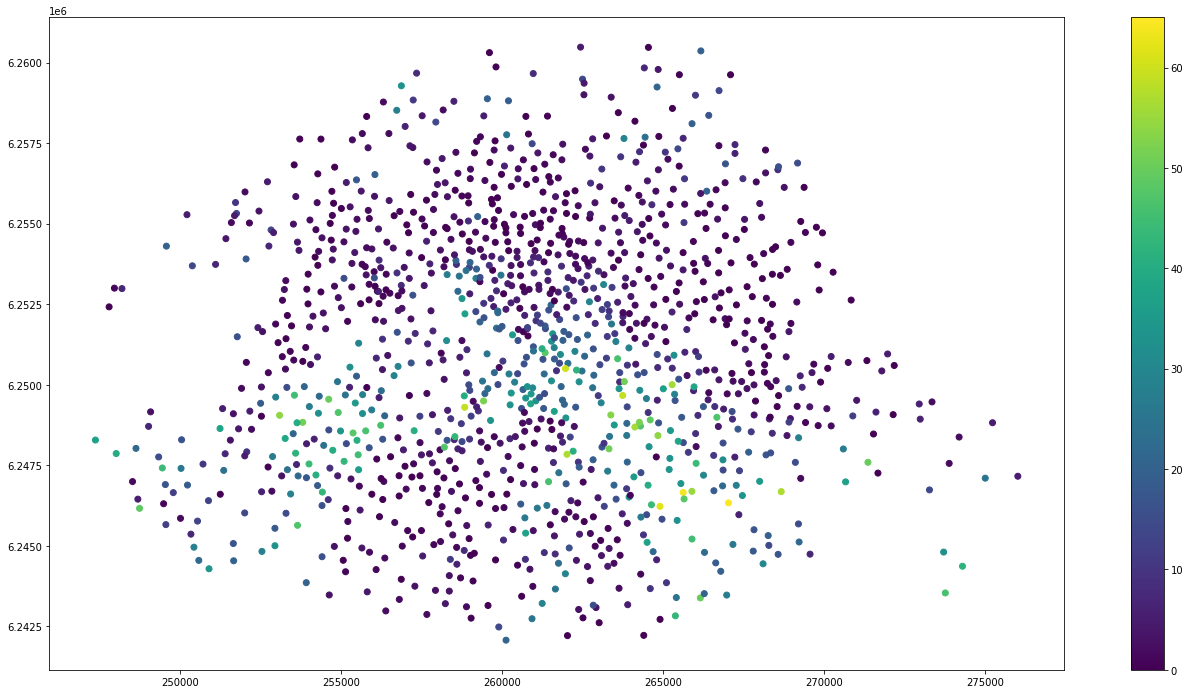

In [47]:
stations.plot(figsize=(24,12), column='available_bikes', legend=True)

In [48]:
districts = geopandas.read_file("paris_districts_utm.geojson")
districts.head(10)

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5..."
6,7,Mail,5783,"POLYGON ((452097.193 5412644.279, 452084.774 5..."
7,8,Bonne-Nouvelle,9595,"POLYGON ((452439.958 5412587.532, 452397.232 5..."
8,9,Arts-et-Metiers,9560,"POLYGON ((453078.109 5412667.110, 453044.807 5..."
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5..."


In [49]:
districts.shape

(80, 4)

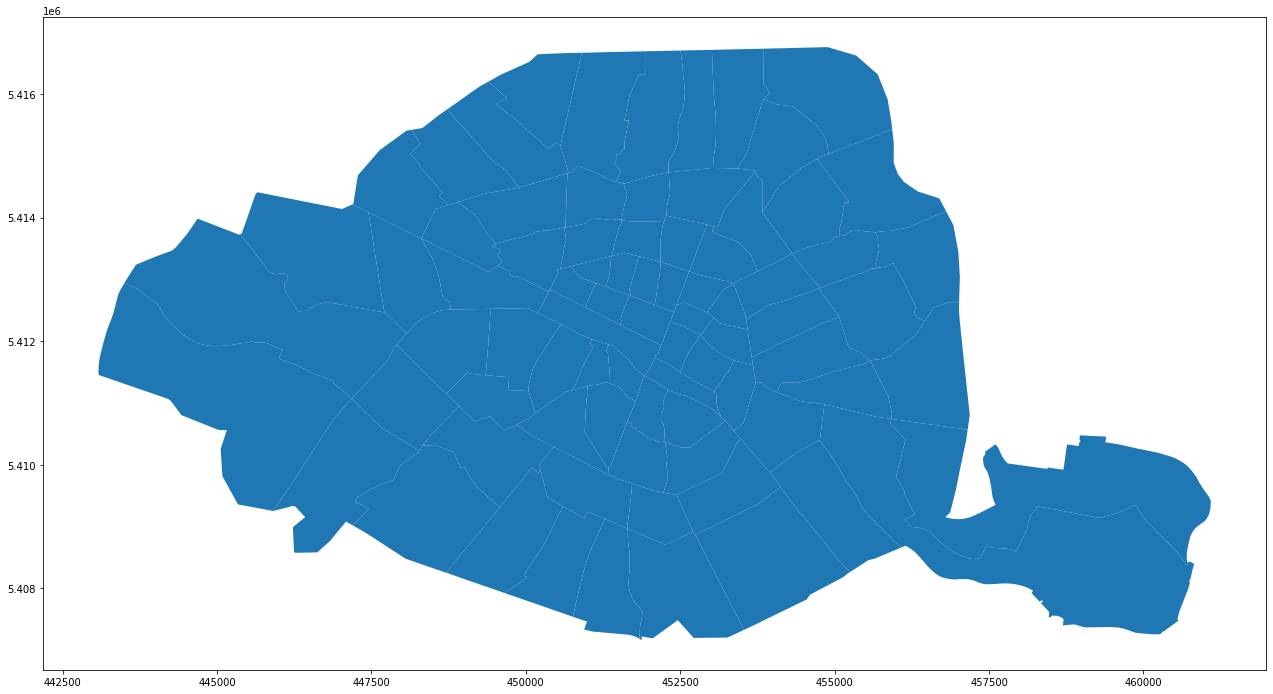

In [50]:
districts.plot(figsize=(24,12))